In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SpectralSynthesis as SS

In [2]:
H_actual=0.5
sigma= 1.0

In [3]:
X = SS.fBm(2700,E = 2, H=H_actual, sigma = sigma, Seed = 120)

C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:57: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


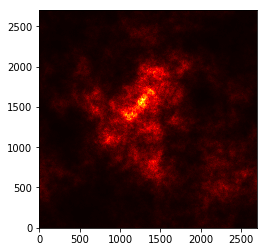

In [4]:
plt.imshow(X, cmap ='hot', origin = 'lower')
plt.show()

In [5]:
import DeltaVar as DV

In [6]:
X_slice = X[450:2250,450:2250]
N = np.shape(X_slice)
N= N[0]
print(N)

1800


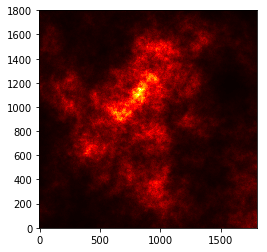

In [7]:
plt.imshow(X_slice, origin = 'lower', cmap = 'hot')
plt.show()

In [8]:
v = 1.5
L_max = 2*N / (3*v)
n = 100
L = np.linspace(0.5,5, n)

In [9]:
sigma_d = []
for i in range(0,n):
    sigma_d.append(DV.DeltaVar(X_slice,L[i],v, method = 'fourier'))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [10]:
log_sigma_d = np.log10(sigma_d)
log_L = np.log10(L)

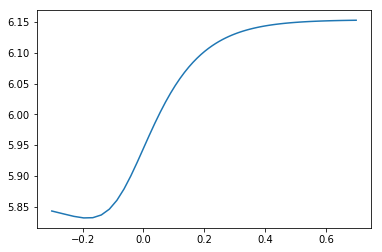

In [11]:
plt.plot(log_L,log_sigma_d)
plt.show()

In [12]:
from scipy.interpolate import UnivariateSpline

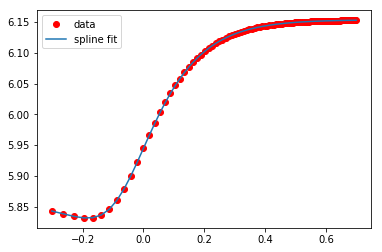

In [13]:
y_spl = UnivariateSpline(log_L,log_sigma_d,s=0,k=4)

plt.plot(log_L,log_sigma_d,'ro',label = 'data')
plt.plot(log_L,y_spl(log_L), label ='spline fit')
plt.legend()
plt.show()

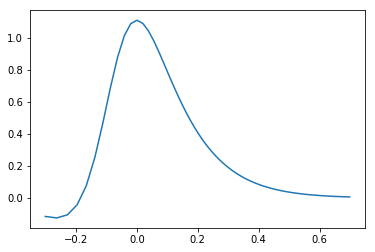

In [14]:
y_spl_1d = y_spl.derivative(n=1)
plt.plot(log_L,y_spl_1d(log_L))

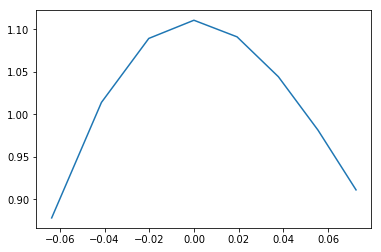

In [27]:
range_max1d = log_L[y_spl_1d(log_L)>(np.max(y_spl_1d(log_L))-0.25)]

plt.plot(range_max1d, y_spl_1d(range_max1d))
plt.show()

In [28]:
linear_log_L = range_max1d
linear_log_sigma_d = y_spl(range_max1d)

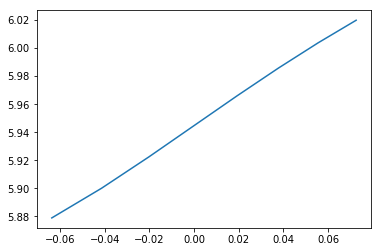

In [29]:
plt.plot(linear_log_L,linear_log_sigma_d)
plt.show()

In [30]:
from scipy.optimize import curve_fit

In [31]:
def f(x, A, B):
    return A*x + B

In [32]:
A,B = curve_fit(f, linear_log_L, linear_log_sigma_d)[0]

In [33]:
print(A)

1.05287113361


In [34]:
print(B)

5.94479176227


In [35]:
beta = A + 2

In [36]:
H = (beta-2)/2

In [37]:
print(H)

0.526435566805


C:\Users\C1764397\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


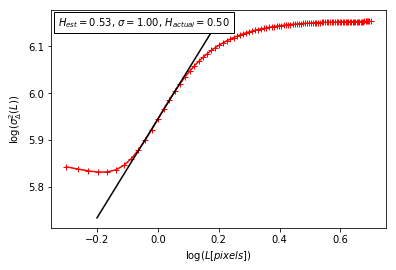

In [49]:
x = np.linspace(-0.2,0.2,100)
y = f(x,A,B)

plt.plot(log_L,log_sigma_d, 'r')
plt.plot(log_L,log_sigma_d, 'r+')
plt.plot(x,y, 'k')
plt.xlabel(r'$\log(L[pixels])$')
plt.ylabel(r'$\log(\sigma_\Delta^2(L))$')
props = dict(facecolor ='white')
ax = plt.axes()
plt.text(0.02,0.93,r'$H_{est}=$'+'%.2f' % H+', '+r'$\sigma = $'+'%.2f' % sigma+', '+r'$H_{actual} = $'+'%.2f' % H_actual, transform = ax.transAxes, bbox = props)
plt.show()